In [17]:
import pandas as pd
import seaborn as sns

In [18]:
data = pd.read_csv('train_clean.csv')

In [19]:
corr_matrix = data.corr()

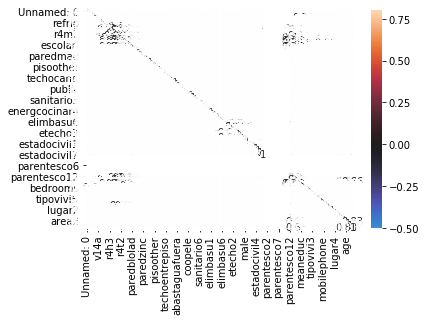

In [28]:
sns.heatmap(corr_matrix, vmin = -0.5, vmax = 0.8, center = 0, 
             annot = True);

In [29]:
corr = data.corr().unstack().sort_values()

In [30]:
corr.iloc[:20]

female           male              -1.000000
area1            area2             -1.000000
area2            area1             -1.000000
male             female            -1.000000
public           coopele           -0.974788
coopele          public            -0.974788
sanitario3       sanitario2        -0.944550
sanitario2       sanitario3        -0.944550
abastaguadentro  abastaguafuera    -0.939798
abastaguafuera   abastaguadentro   -0.939798
energcocinar2    energcocinar3     -0.901768
energcocinar3    energcocinar2     -0.901768
elimbasu3        elimbasu1         -0.829835
elimbasu1        elimbasu3         -0.829835
pisocemento      pisomoscer        -0.807326
pisomoscer       pisocemento       -0.807326
epared3          epared2           -0.800283
epared2          epared3           -0.800283
techoentrepiso   techozinc         -0.799179
techozinc        techoentrepiso    -0.799179
dtype: float64

In [10]:
#PCA
from sklearn.decomposition import PCA

In [7]:
type1 = data.dtypes

In [8]:
type(type1)

pandas.core.series.Series

In [9]:
type1.iloc[:10]

household_id              object
id                        object
rent_monthly             float64
bedrooms_overcrowding      int64
rooms                      int64
rooms_overcrowding         int64
has_toilet                 int64
has_fridge                 int64
tablets_owned_count        int64
males_under_12             int64
dtype: object

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [4]:
!pip install sklearn

In [6]:
from sklearn.impute import SimpleImputer

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs = -1)

In [13]:
model_2 = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs = -1, class_weight = "balanced")

In [16]:
train_labels = np.array(list(data[data['target'].notnull()]['target'].astype(np.uint8)))

In [15]:
import numpy as np

In [17]:
train_set = data[data['target'].notnull()].drop(columns = ['household_id', 'id', 'target'])

In [17]:
train_set

,rent_monthly,bedrooms_overcrowding,rooms,rooms_overcrowding,has_toilet,has_fridge,tablets_owned_count,males_under_12,males_over_12,males_total,females_under_12,females_over_12,females_total,persons_under_12,persons_over_12,persons_total,total_household,schooling,household_size,walls_brick,walls_socket,walls_prefab,walls_waste,walls_wood,walls_zinc,walls_natural,walls_other,floor_tile,floor_cement,floor_other,floor_natural,floor_na,floor_wood,roof_metal,roof_cement,roof_natural,roof_other,has_cieling,water_inside,water_outside,water_na,elec_public,elec_private,elec_na,elec_coop,toilet_na,toilet_sewer,toilet_septank,toilet_latrine,toilet_other,energ_na,energ_cook_elec,energ_cook_gas,energ_cook_wood,trash_truck,trash_buried,trash_burn,trash_dump,trash_water,trash_other,qualwall_bad,qualwall_reg,qualwall_good,qualroof_bad,qualroof_reg,qualroof_good,qualfloor_bad,qualfloor_reg,qualfloor_good,male,female,ec_under_10,ec_free_union,ec_married,ec_divorced,ec_separated,ec_widow/er,ec_single,pc_house_head,pc_spouse,pc_child,pc_stepchild,pc_child_inlaw,pc_grandchild,pc_parent,pc_parent_inlaw,pc_sibling,pc_sibling_inlaw,pc_fam_other,pc_nonfam_other,total_children,total_adults,total_seniors,total_members,mean_edu,bedrooms,overcrowding,house_own,house_mortgage,house_rent,house_prec,house_other,has_computer,has_television,has_mobileph,total_mobileph,reg_central,reg_chorotega,reg_paccentral,reg_brunca,reg_huetaratl,reg_huetarnor,zone_urban,zone_rural,age,dis_cnt,mean_age
0,0.0,0,6,0,1,1,1,0,0,0,1,1,2,1,1,2,2,16,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,16.0,4,0.500000,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,38,0,19.000000
1,0.0,0,3,0,1,1,0,2,1,3,0,1,1,2,2,4,4,6,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,2,0,4,6.5,2,2.000000,0,0,0,0,1,0,0,1,2,0,0,0,0,1,0,1,0,24,0,12.750000
2,0.0,0,4,0,1,1,0,0,2,2,0,0,0,0,2,2,2,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,3.0,3,0.666667,0,0,0,0,1,0,0,1,2,0,1,0,0,0,0,0,1,50,0,33.000000
3,0.0,0,5,0,1,1,0,0,1,1,0,1,1,0,2,2,2,8,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,8.0,2,1.000000,1,0,0,0,0,0,0,1,2,0,0,1,0,0,0,1,0,59,0,37.500000
4,0.0,0,8,0,1,0,0,1,1,2,0,1,1,1,2,3,3,9,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,3,9.0,6,0.500000,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,32,0,17.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,0.0,0,5,0,1,1,1,0,3,3,0,1,1,0,4,4,4,6,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4,8.0,3,1.333333,1,0,0,0,0,0,1,1,4,1,0,0,0,0,0,1,0,54,0,39.500000
2969,150000.0,0,5,0,1,1,0,0,1,1,1,1,2,1,2,3,3,16,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,3,13.5,3,1.000000,0,0,1,0,0,0,0,1,2,0,0,0,0,1,0,1,0,32,0,19.666667
2970,0.0,0,3,0,1,1,0,0,1,1,0,1,1,0,2,2,2,11,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,8.5,1,2.000000,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,

In [19]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])

In [20]:
train_set = pipeline.fit_transform(train_set)

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)

In [21]:
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [22]:
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

In [59]:
cv_score2 = cross_val_score(model_2, train_set, train_labels, cv = 10, scoring = scorer)

C:\Users\pcluc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
#imbalanced

cv_score

array([0.32272224, 0.3640829 , 0.33948215, 0.32197044, 0.3115869 ,
       0.28909239, 0.3286241 , 0.33300623, 0.29991853, 0.29953065])

In [60]:
#balanced

cv_score2

array([0.35489369, 0.38088318, 0.36411018, 0.30780818, 0.29124296,
       0.28668684, 0.32559686, 0.30779402, 0.30795119, 0.24457919])

In [24]:
print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.321 with std = 0.021


In [61]:
#imbalanced

print(f'10 Fold Cross Validation F1 Score = {round(cv_score2.mean(), 4)} with std = {round(cv_score2.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3172 with std = 0.0386


In [25]:
from sklearn.tree import export_graphviz

In [26]:
model.fit(train_set,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [27]:
estimator = model.estimators_[5]

In [30]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                class_names = 'target',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [33]:
tree_viz = export_graphviz(estimator,
                feature_names= features,
                filled=True,
                rounded=True)

In [35]:
import os

In [36]:
os.system('dot -Tpng tree.dot -o tree.png')

1

In [33]:
#https://github.com/WillKoehrsen/data-science-for-good/blob/master/costa-rican-poverty/A%20Complete%20Walkthrough.ipynb
# Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

#Can we use class_weight = "balanced" to fix this issue?

In [31]:
# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""

    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [64]:
# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model_2(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""

    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [67]:
#imbalanced

model_results = cv_model(train_set, train_labels, LinearSVC(), 
                         'LSVC', model_results)

10 Fold CV Score: 0.31922 with std: 0.02723


In [69]:
# LSVC balanced

clf = LinearSVC(random_state=0, tol=1e-5, class_weight = 'balanced')

cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)

C:\Users\pcluc\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [43]:
model_results = cv_model(train_set, train_labels, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.12385 with std: 0.02149


In [44]:
model_results = cv_model(train_set, train_labels, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.3581 with std: 0.03518


In [45]:
model_results = cv_model(train_set, train_labels, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.37817 with std: 0.03588


In [46]:
model_results = cv_model(train_set, train_labels, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.2902 with std: 0.01995


In [47]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.30377 with std: 0.02644

KNN with 10 neighbors

10 Fold CV Score: 0.27628 with std: 0.0236

KNN with 20 neighbors

10 Fold CV Score: 0.26605 with std: 0.01664


In [48]:
model_results = cv_model(train_set, train_labels,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.321 with std: 0.02101


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
model_results.index.name = 'model'
model_results.reset_index(inplace=True)

In [54]:
model_results

,model,cv_mean,cv_std
0,LSVC,0.319225,0.027227
1,GNB,0.123853,0.021487
2,MLP,0.358103,0.035178
3,LDA,0.378169,0.035881
4,RIDGE,0.290204,0.019947
5,knn-5,0.303767,0.026445
6,knn-10,0.276280,0.023596
7,knn-20,0.266052,0.016636
8,RF,0.321002,0.021014


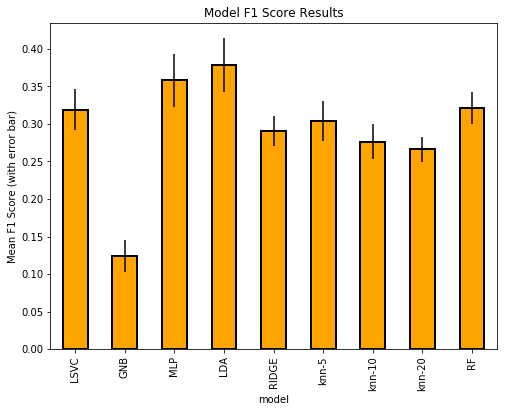

In [56]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [23]:
# to perform over sampling to handle the imbalance in the data

from collections import Counter

from imblearn.over_sampling import SMOTE

In [71]:
!pip install imblearn

  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\pcluc\\AppData\\Local\\Temp\\pip-uninstall-akf22rvu\\users\\pcluc\\anaconda3\\lib\\site-packages\\sklearn\\decomposition\\cdnmf_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [73]:
!pip install imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/c8/73/36a13185c2acff44d601dc6107b5347e075561a49e15ddd4e69988414c3e/imbalanced_learn-0.6.2-py3-none-any.whl


In [75]:
!pip install sklearn

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\pcluc\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [28]:
print('Original dataset shape %s' % Counter(np.ravel(train_labels)))

sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(train_set, np.ravel(train_labels))

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({4: 1954, 2: 442, 3: 355, 1: 222})
Resampled dataset shape Counter({4: 1954, 2: 1954, 3: 1954, 1: 1954})


In [34]:
#balanced

model_results_balanced = cv_model(X_res, y_res, LinearSVC(), 
                         'LSVC', model_results)

10 Fold CV Score: 0.52966 with std: 0.02111


In [35]:
#balanced

model_results_balanced = cv_model(X_res, y_res, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.20135 with std: 0.01433


In [36]:
model_results_balanced = cv_model(X_res, y_res, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.89084 with std: 0.04103


In [37]:
model_results_balanced = cv_model(X_res, y_res, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.53967 with std: 0.02097


In [38]:
model_results_balanced = cv_model(X_res, y_res, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.52571 with std: 0.01838


In [39]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results_balanced = cv_model(X_res, y_res, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.81774 with std: 0.01933

KNN with 10 neighbors

10 Fold CV Score: 0.75978 with std: 0.02433

KNN with 20 neighbors

10 Fold CV Score: 0.67379 with std: 0.04323


In [40]:
model_results_balanced = cv_model(X_res, y_res,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.91246 with std: 0.07424


In [43]:
model_results_balanced.set_index('model', inplace = True)
model_results_balanced['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results_balanced['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');


KeyError: "None of ['model'] are in the columns"